Fault Motors Detection in Hexapod Robots Using Machine Learning Models ( Detect One Joint )

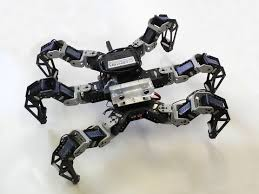                   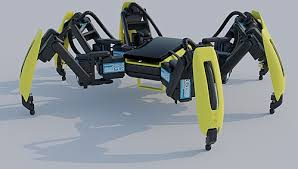

Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix,f1_score

Read Dataset

In [6]:
df=pd.read_csv('/kaggle/input/fault-detection-in-hexapod-robot-joints-dataset/Hexapod_One_Joint.csv')
#df = df.iloc[:6000,:]
df

,Label,X,Y,Z,slop(x),slop(x/z),slop(1/z),slop(1/x),slop(z/x),slop(z)
0,10,198.451771,0.680672,-56.848844,-1.784364,14.931292,8.367851,0.560,0.066973,0.119505
1,16,809.930556,0.696091,-22.704940,-1.626685,10.184732,6.261035,0.615,0.098186,0.159718
2,14,973.360544,0.746095,-8.966940,-1.609769,7.715164,4.792715,0.621,0.129615,0.208650
3,0,355.679365,0.746279,38.524896,-1.564812,-18.062748,-11.543079,0.639,-0.055363,-0.086632
4,3,1050.259648,0.749272,-11.922828,0.809810,0.680050,-0.839765,-1.230,1.470479,-1.190809
...,...,...,...,...,...,...,...,...,...,...
17950,4,284.002426,0.658266,44.407989,-1.704572,-17.250309,-10.120023,0.587,-0.057970,-0.098814
17951,4,820.942625,0.658266,13.281694,-1.704572,-17.250309,-10.120023,0.587,-0.057970,-0.098814
17952,15,1050.296734,0.744561,0.113085,-1.692009,-54.912180,-32.453834,0.591,-0.018211,-0.030813
17953,-1,764.636960,0.746216,-0.403580,-1.606589,357.735248,222.667557,0.622,0.002795,0.004491


In [7]:
# Checking Null values for Dataset
df.isnull().sum()*100/df.shape[0]

Label        0.0
X            0.0
Y            0.0
Z            0.0
slop(x)      0.0
slop(x/z)    0.0
slop(1/z)    0.0
slop(1/x)    0.0
slop(z/x)    0.0
slop(z)      0.0
dtype: float64

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17955 entries, 0 to 17954
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      17955 non-null  int64  
 1   X          17955 non-null  float64
 2   Y          17955 non-null  float64
 3   Z          17955 non-null  float64
 4   slop(x)    17955 non-null  float64
 5   slop(x/z)  17955 non-null  float64
 6   slop(1/z)  17955 non-null  float64
 7   slop(1/x)  17955 non-null  float64
 8   slop(z/x)  17955 non-null  float64
 9   slop(z)    17955 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.4 MB
None


In [9]:
print(df.describe())

              Label             X             Y             Z       slop(x)  \
count  17955.000000  17955.000000  17955.000000  17955.000000  17955.000000   
mean       8.000000    427.719463      0.736197     -0.108618     -0.058155   
std        5.477378    512.952555      0.025922     56.110866     43.919366   
min       -1.000000   -640.199258      0.658266   -196.751710    -24.891189   
25%        3.000000    -21.060483      0.744363    -26.302575     -1.705343   
50%        8.000000    473.041722      0.746084     -0.201861     -1.606590   
75%       13.000000    967.130881      0.748290     28.088718     -1.564812   
max       17.000000   1069.289240      0.790072    180.184519   1684.321399   

          slop(x/z)     slop(1/z)     slop(1/x)     slop(z/x)       slop(z)  
count  17955.000000  17955.000000  17955.000000  17955.000000  17955.000000  
mean      37.754706     24.971219      0.837486      0.002879      0.000022  
std      158.556011     97.424013     30.744034     36

In [10]:
classes = list(df.keys())
print(classes)
df.shape

['Label', 'X', 'Y', 'Z', 'slop(x)', 'slop(x/z)', 'slop(1/z)', 'slop(1/x)', 'slop(z/x)', 'slop(z)']


(17955, 10)

In [11]:
df

,Label,X,Y,Z,slop(x),slop(x/z),slop(1/z),slop(1/x),slop(z/x),slop(z)
0,10,198.451771,0.680672,-56.848844,-1.784364,14.931292,8.367851,0.560,0.066973,0.119505
1,16,809.930556,0.696091,-22.704940,-1.626685,10.184732,6.261035,0.615,0.098186,0.159718
2,14,973.360544,0.746095,-8.966940,-1.609769,7.715164,4.792715,0.621,0.129615,0.208650
3,0,355.679365,0.746279,38.524896,-1.564812,-18.062748,-11.543079,0.639,-0.055363,-0.086632
4,3,1050.259648,0.749272,-11.922828,0.809810,0.680050,-0.839765,-1.230,1.470479,-1.190809
...,...,...,...,...,...,...,...,...,...,...
17950,4,284.002426,0.658266,44.407989,-1.704572,-17.250309,-10.120023,0.587,-0.057970,-0.098814
17951,4,820.942625,0.658266,13.281694,-1.704572,-17.250309,-10.120023,0.587,-0.057970,-0.098814
17952,15,1050.296734,0.744561,0.113085,-1.692009,-54.912180,-32.453834,0.591,-0.018211,-0.030813
17953,-1,764.636960,0.746216,-0.403580,-1.606589,357.735248,222.667557,0.622,0.002795,0.004491


Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

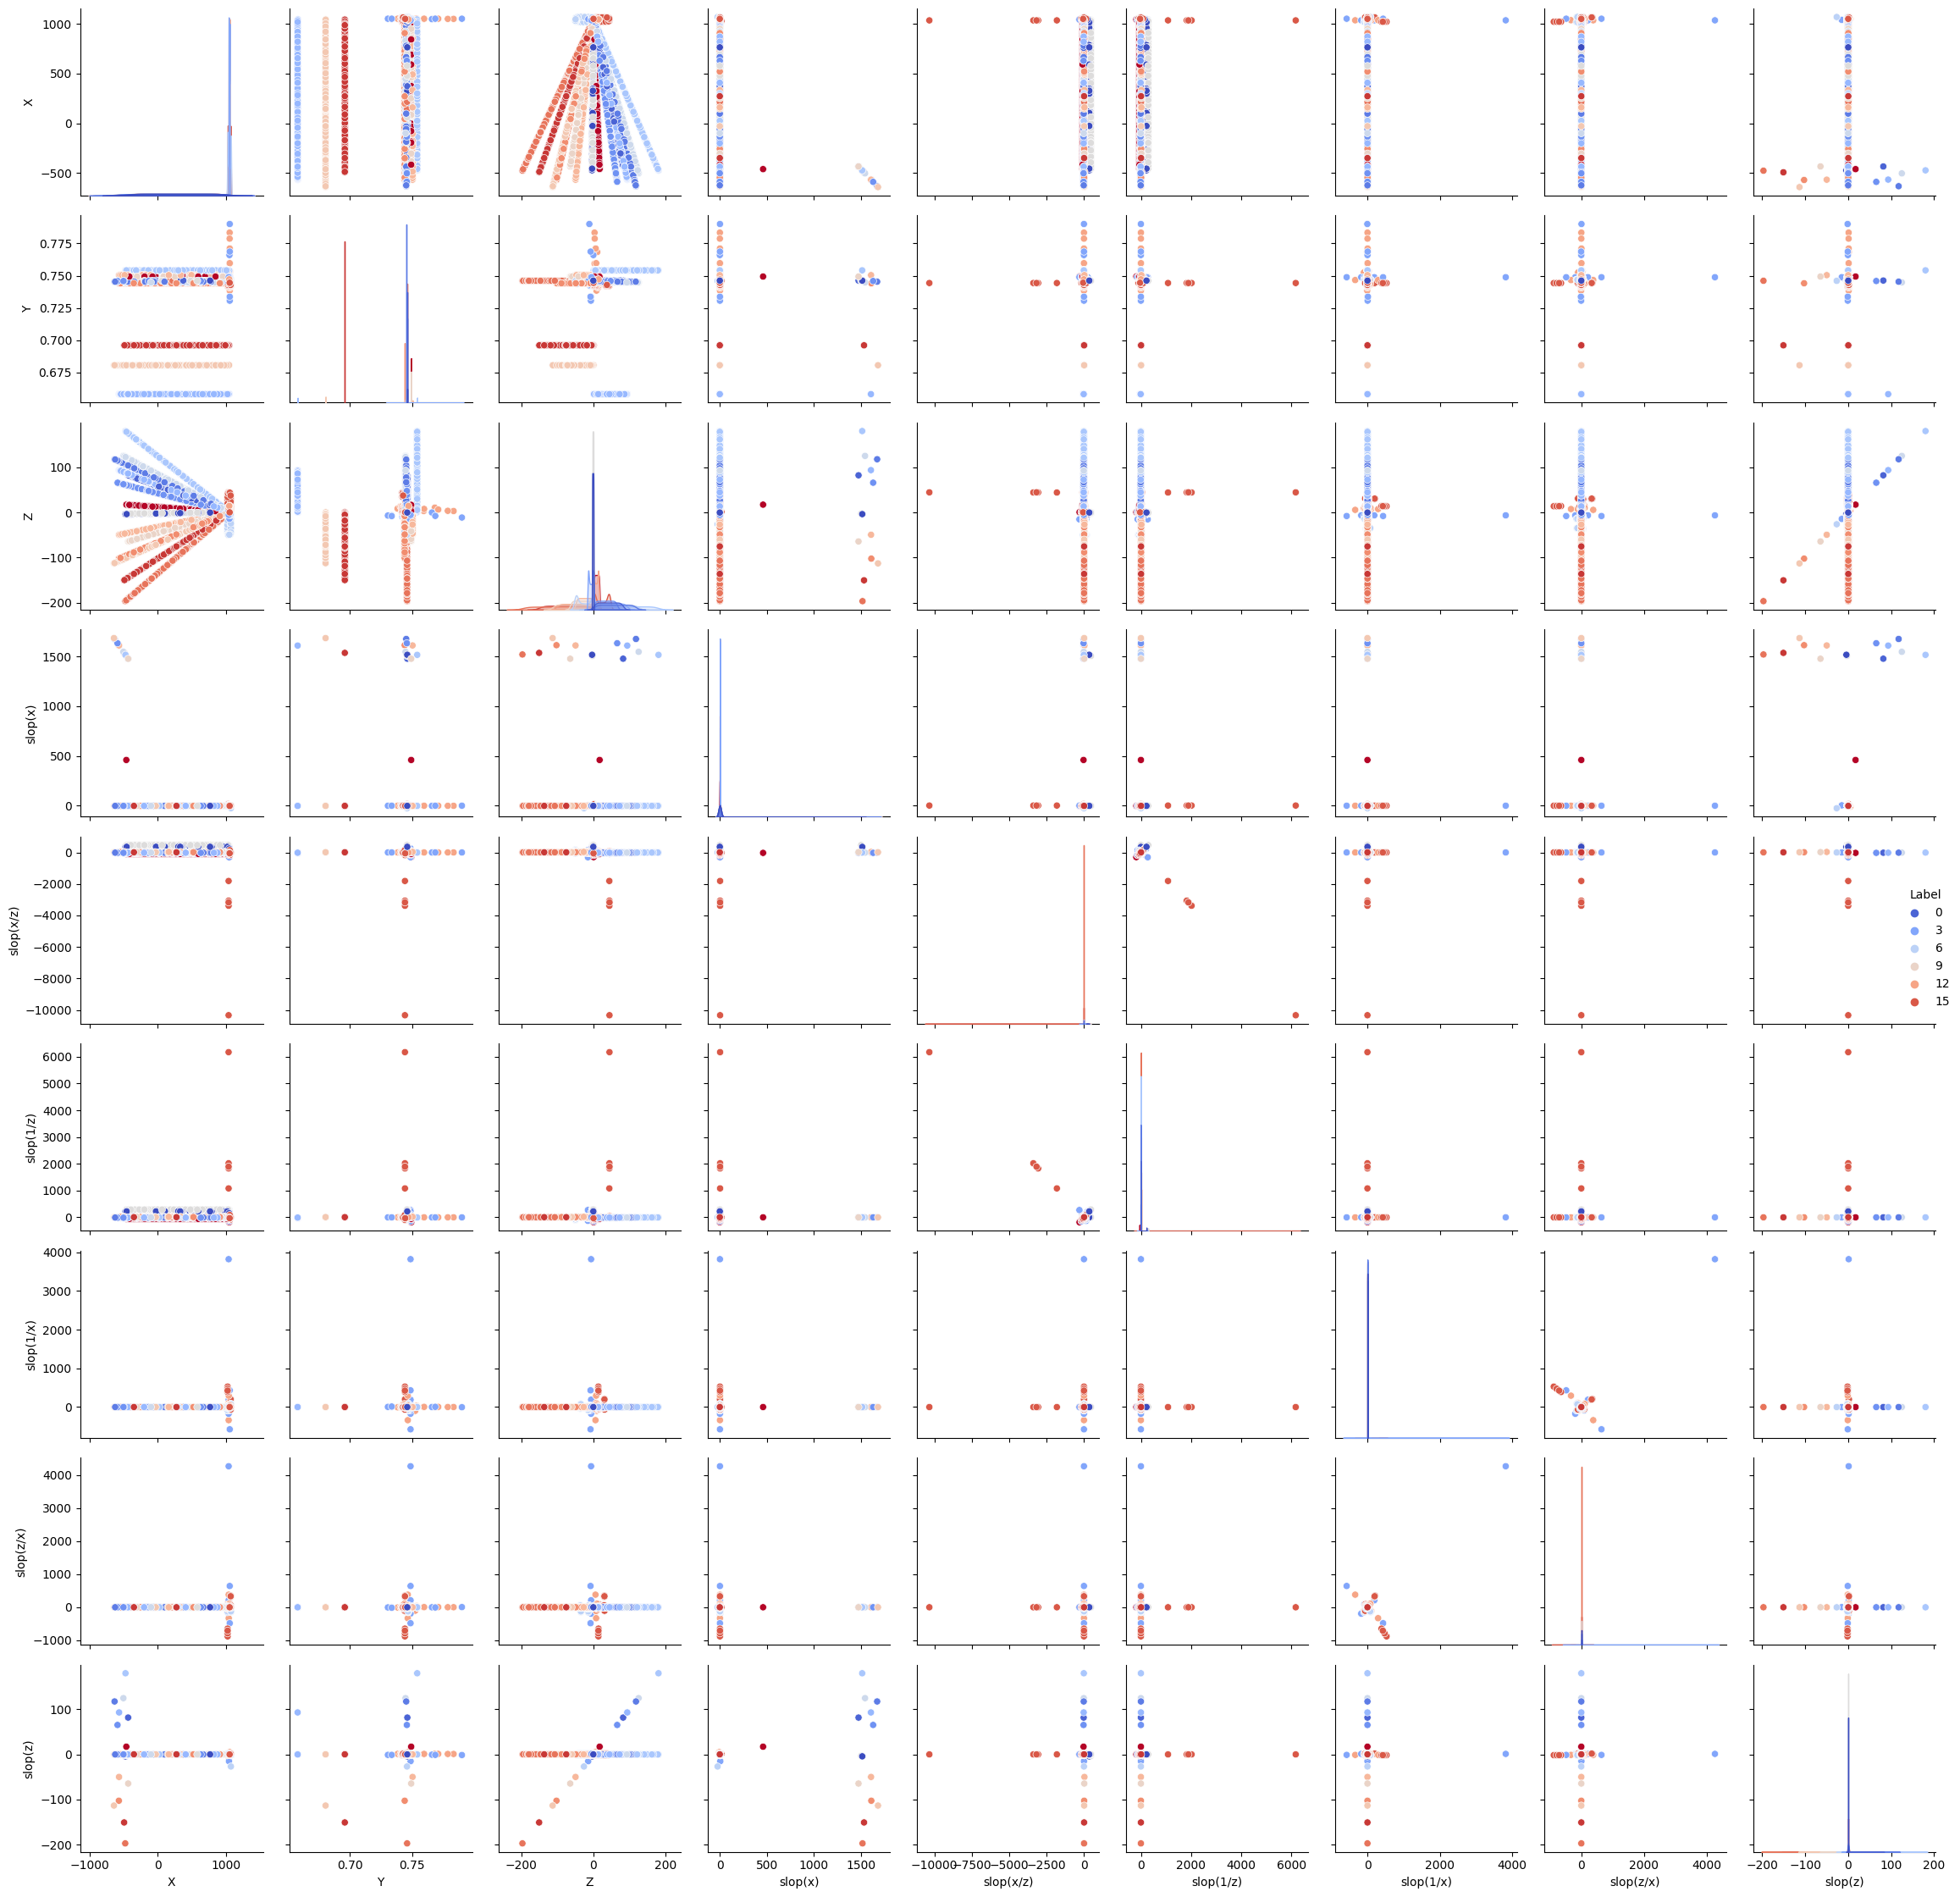

In [12]:
# Visualize features
sns.pairplot(df, hue='Label', palette='coolwarm')
plt.tight_layout()
plt.show()

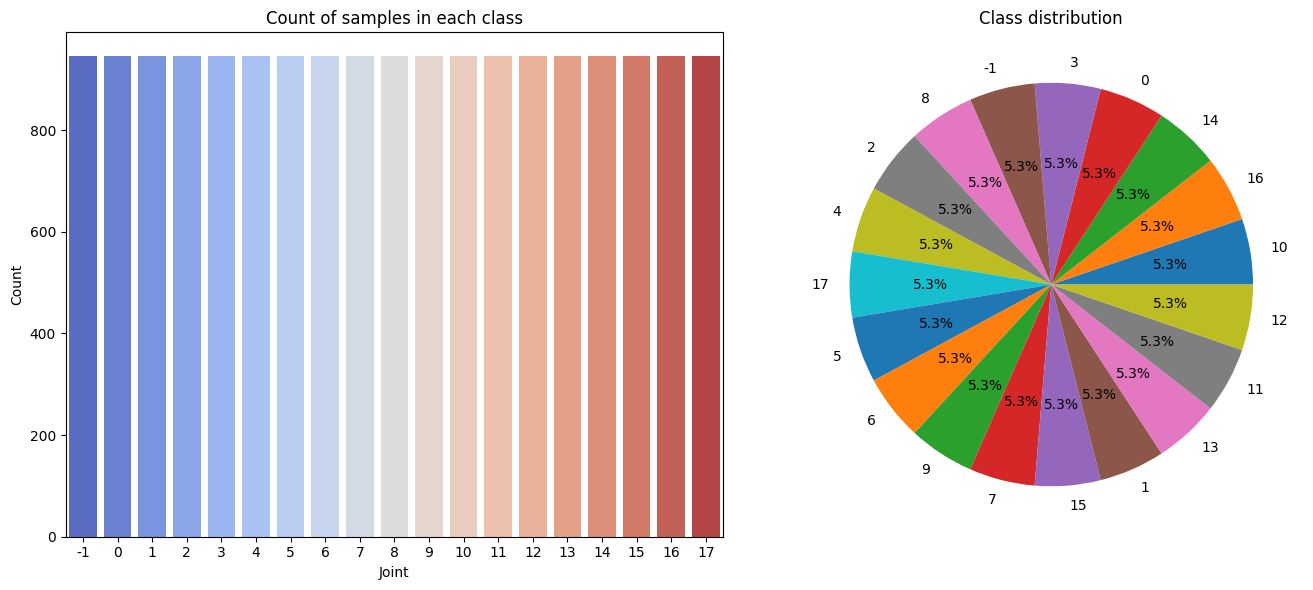

In [13]:
# Count number of samples in each class using bar chart and pie chart
class_counts = df['Label'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Bar chart
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm', ax=axs[0])
axs[0].set_title('Count of samples in each class')
axs[0].set_xlabel('Joint')
axs[0].set_ylabel('Count')

# Pie chart
axs[1].pie(class_counts,labels=class_counts.index, autopct='%1.1f%%')
axs[1].set_title('Class distribution')
plt.tight_layout()
plt.show()

In [14]:
df.shape

(17955, 10)

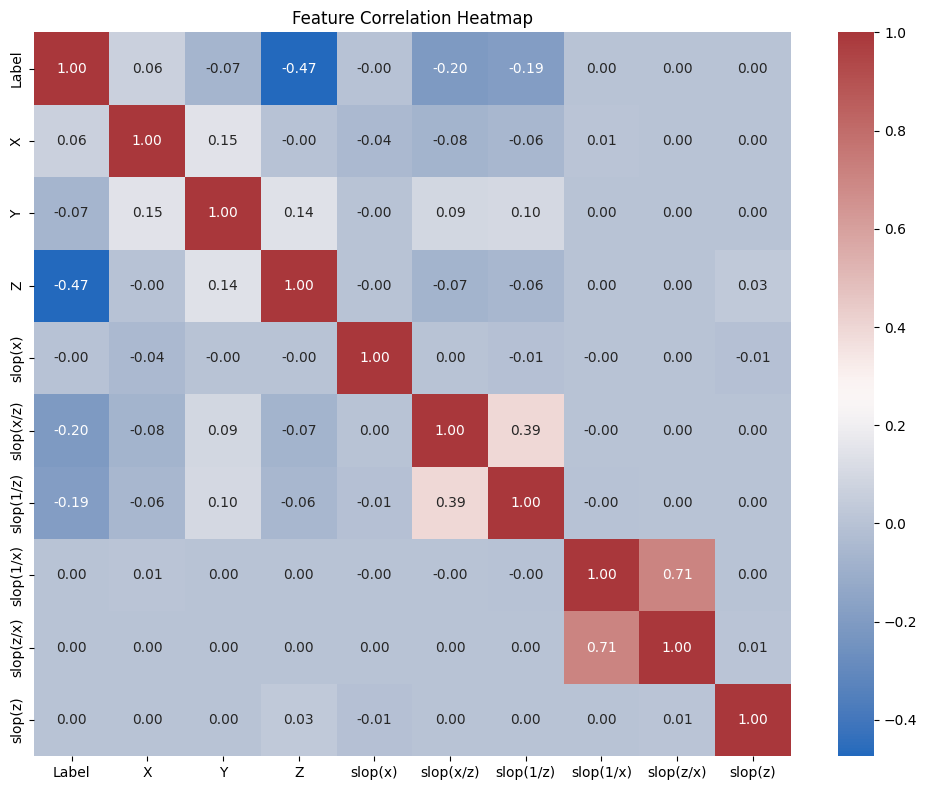

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='vlag', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [16]:
# Define feature matrix X and target vector y
y=df.pop('Label')
X=df

Scale the features

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the dataset into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
models_names = []
accuracies_of_models = []
mse_of_models = []
f1_score_of_models = []

Building Machine Learning Models

1 - Logistic Regression

Logistic Regression Accuracy: 0.9267613478139793


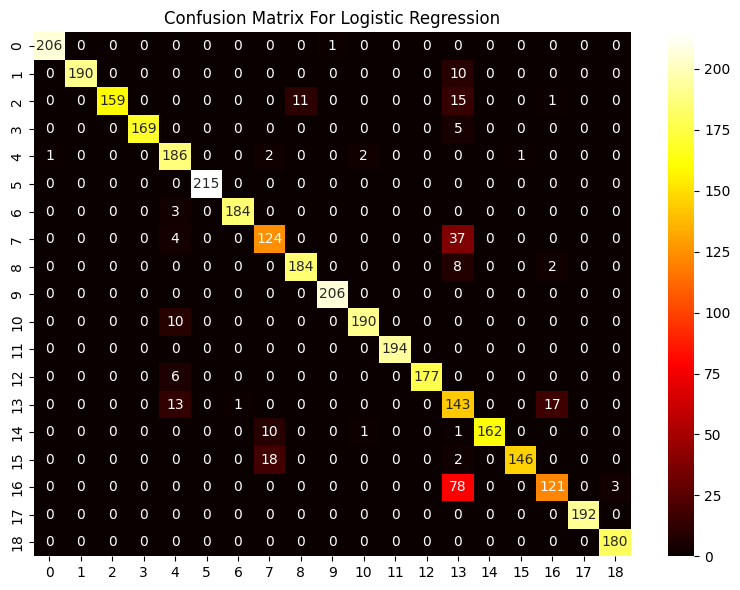

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       207
           0       0.95      1.00      0.97       190
           1       0.85      1.00      0.92       159
           2       0.97      1.00      0.99       169
           3       0.97      0.84      0.90       222
           4       1.00      1.00      1.00       215
           5       0.98      0.99      0.99       185
           6       0.75      0.81      0.78       154
           7       0.95      0.94      0.95       195
           8       1.00      1.00      1.00       207
           9       0.95      0.98      0.97       193
          10       1.00      1.00      1.00       194
          11       0.97      1.00      0.98       177
          12       0.82      0.48      0.60       299
          13       0.93      1.00      0.96       162
          14       0.88      0.99      0.93       147
          15       0.60      0.86      0.71       141
          16       1.00    

In [34]:
Logistic_Regression_model = LogisticRegression(max_iter=5000)
Logistic_Regression_model.fit(X_train,y_train)
y_pred = Logistic_Regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

models_names.append('Logistic Regression')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_pred,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For Logistic Regression')
plt.tight_layout()
plt.show()

print(classification_report(y_pred,y_test))

2 - SVM with Linear Kernel model

SVM linear: 0.9746588693957114


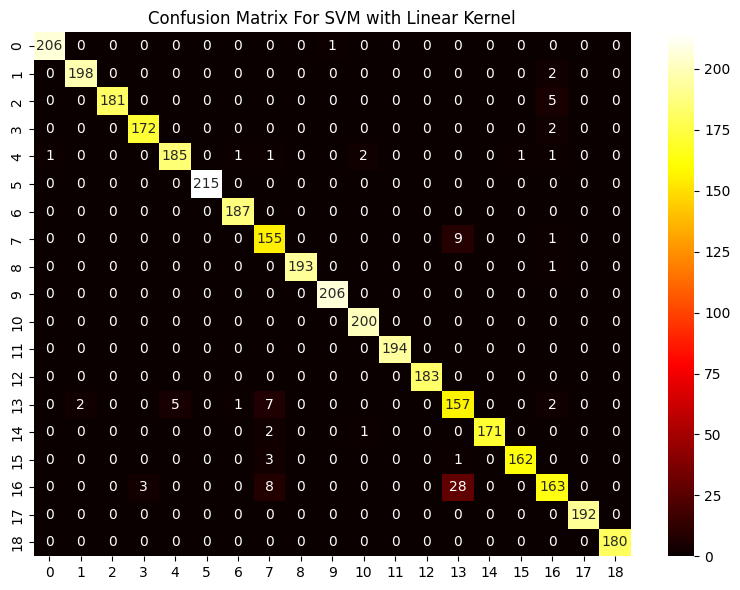

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       207
           0       0.99      0.99      0.99       200
           1       0.97      1.00      0.99       181
           2       0.99      0.98      0.99       175
           3       0.96      0.97      0.97       190
           4       1.00      1.00      1.00       215
           5       1.00      0.99      0.99       189
           6       0.94      0.88      0.91       176
           7       0.99      1.00      1.00       193
           8       1.00      1.00      1.00       207
           9       1.00      0.99      0.99       203
          10       1.00      1.00      1.00       194
          11       1.00      1.00      1.00       183
          12       0.90      0.81      0.85       195
          13       0.98      1.00      0.99       171
          14       0.98      0.99      0.98       163
          15       0.81      0.92      0.86       177
          16       1.00    

In [35]:
SVC_Linear_Kernel_model = SVC(kernel='linear',C=20)
SVC_Linear_Kernel_model.fit(X_train,y_train)
y_pred = SVC_Linear_Kernel_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM linear: {accuracy}')
models_names.append('SVM Linear Kernel model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_pred,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For SVM with Linear Kernel')
plt.tight_layout()
plt.show()

print(classification_report(y_pred,y_test))

3 - SVM RBF Kernel model

SVM RBF: 0.9629629629629629


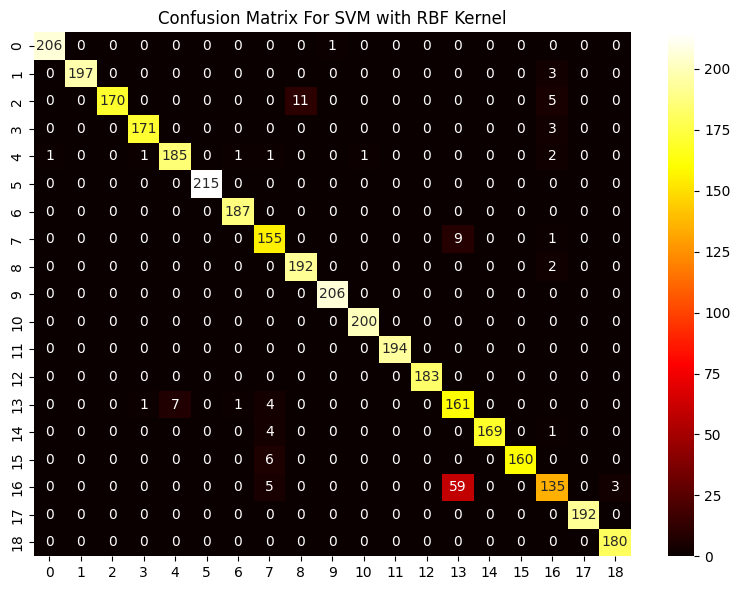

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       207
           0       0.98      1.00      0.99       197
           1       0.91      1.00      0.96       170
           2       0.98      0.99      0.99       173
           3       0.96      0.96      0.96       192
           4       1.00      1.00      1.00       215
           5       1.00      0.99      0.99       189
           6       0.94      0.89      0.91       175
           7       0.99      0.95      0.97       203
           8       1.00      1.00      1.00       207
           9       1.00      1.00      1.00       201
          10       1.00      1.00      1.00       194
          11       1.00      1.00      1.00       183
          12       0.93      0.70      0.80       229
          13       0.97      1.00      0.99       169
          14       0.96      1.00      0.98       160
          15       0.67      0.89      0.76       152
          16       1.00    

In [36]:
SVC_RBF_Kernel_model = SVC(kernel='rbf',max_iter=5000,C=20)
SVC_RBF_Kernel_model.fit(X_train,y_train)
y_pred = SVC_RBF_Kernel_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM RBF: {accuracy}')
models_names.append('SVM RBF Kernel model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_pred,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For SVM with RBF Kernel')
plt.tight_layout()
plt.show()

print(classification_report(y_pred,y_test))

4 - Perceptron Model

Perceptron Accuracy: 0.5903648008911166


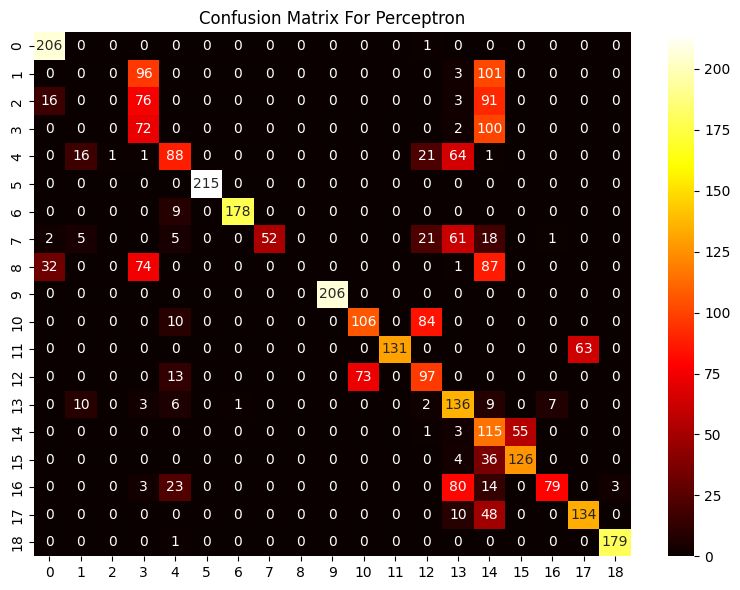

              precision    recall  f1-score   support

          -1       1.00      0.80      0.89       256
           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00         1
           2       0.41      0.22      0.29       325
           3       0.46      0.57      0.51       155
           4       1.00      1.00      1.00       215
           5       0.95      0.99      0.97       179
           6       0.32      1.00      0.48        52
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00       206
           9       0.53      0.59      0.56       179
          10       0.68      1.00      0.81       131
          11       0.53      0.43      0.47       227
          12       0.78      0.37      0.50       367
          13       0.66      0.19      0.29       620
          14       0.76      0.70      0.73       181
          15       0.39      0.91      0.55        87
          16       0.70    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
Perceptron_model = Perceptron(max_iter=5000)
Perceptron_model.fit(X_train,y_train)

y_predicted_PER = Perceptron_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_PER)
print(f'Perceptron Accuracy: {accuracy}')
models_names.append('Perceptron')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_PER,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_PER))

cm = confusion_matrix(y_test,y_predicted_PER)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For Perceptron')
plt.tight_layout()
plt.show()

print(classification_report(y_predicted_PER,y_test))

5 - Stochastic Gradient Descent Model ( SGD )

SGD linear: 0.6137566137566137


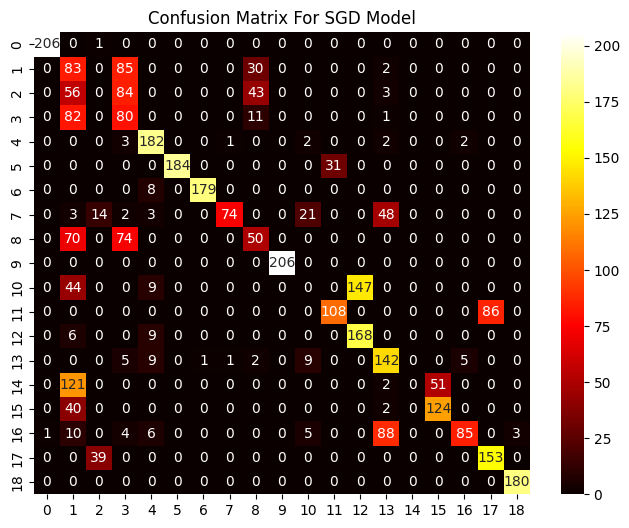

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       207
           0       0.41      0.16      0.23       515
           1       0.00      0.00      0.00        54
           2       0.46      0.24      0.31       337
           3       0.95      0.81      0.87       226
           4       0.86      1.00      0.92       184
           5       0.96      0.99      0.98       180
           6       0.45      0.97      0.61        76
           7       0.26      0.37      0.30       136
           8       1.00      1.00      1.00       206
           9       0.00      0.00      0.00        37
          10       0.56      0.78      0.65       139
          11       0.92      0.53      0.67       315
          12       0.82      0.49      0.61       290
          13       0.00      0.00      0.00         0
          14       0.75      0.71      0.73       175
          15       0.42      0.92      0.58        92
          16       0.80    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
SGD_model = SGDClassifier(max_iter=5000)
SGD_model.fit(X_train,y_train)


y_predicted_SGD = SGD_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_SGD)
print(f'SGD linear: {accuracy}')
models_names.append('SGD model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_SGD,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_SGD))

cm = confusion_matrix(y_test,y_predicted_SGD)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For SGD Model')
plt.show()

print(classification_report(y_predicted_SGD,y_test))

6 - KNN Model

KNN: 0.9704817599554442


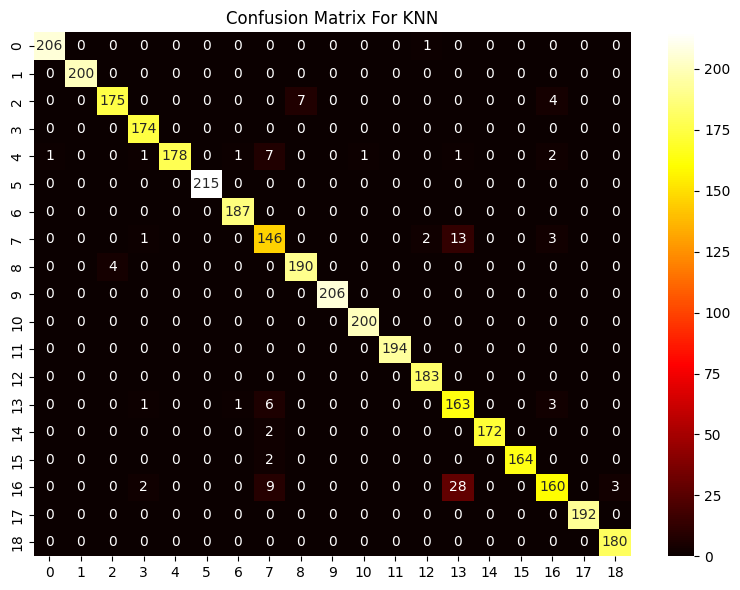

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       207
           0       1.00      1.00      1.00       200
           1       0.94      0.98      0.96       179
           2       1.00      0.97      0.99       179
           3       0.93      1.00      0.96       178
           4       1.00      1.00      1.00       215
           5       1.00      0.99      0.99       189
           6       0.88      0.85      0.87       172
           7       0.98      0.96      0.97       197
           8       1.00      1.00      1.00       206
           9       1.00      1.00      1.00       201
          10       1.00      1.00      1.00       194
          11       1.00      0.98      0.99       186
          12       0.94      0.80      0.86       205
          13       0.99      1.00      0.99       172
          14       0.99      1.00      0.99       164
          15       0.79      0.93      0.86       172
          16       1.00    

In [39]:
KNN_model = KNeighborsClassifier(n_neighbors=50)
KNN_model.fit(X_train,y_train)


y_predicted_KNN = KNN_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_KNN)
print(f'KNN: {accuracy}')
models_names.append('KNN model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_KNN,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_KNN))


cm = confusion_matrix(y_test,y_predicted_KNN)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For KNN')
plt.tight_layout()
plt.show()

print(classification_report(y_predicted_KNN,y_test))

7 - GaussianNB Model

GaussianNB Accuracy: 0.9159008632692843


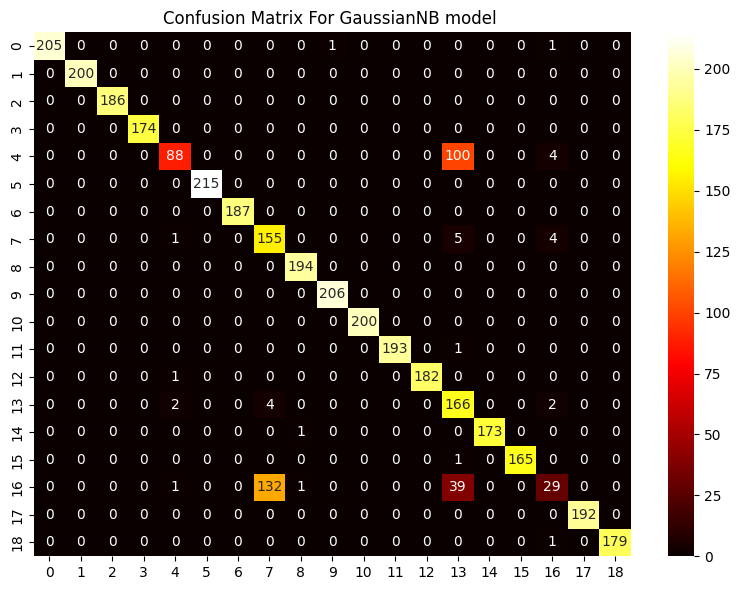

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       205
           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       186
           2       1.00      1.00      1.00       174
           3       0.46      0.95      0.62        93
           4       1.00      1.00      1.00       215
           5       1.00      1.00      1.00       187
           6       0.94      0.53      0.68       291
           7       1.00      0.99      0.99       196
           8       1.00      1.00      1.00       207
           9       1.00      1.00      1.00       200
          10       0.99      1.00      1.00       193
          11       0.99      1.00      1.00       182
          12       0.95      0.53      0.68       312
          13       0.99      1.00      1.00       173
          14       0.99      1.00      1.00       165
          15       0.14      0.71      0.24        41
          16       1.00    

In [40]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train,y_train)

y_predicted_GNB = GaussianNB_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted_GNB)
print(f'GaussianNB Accuracy: {accuracy}')
models_names.append('GaussianNB_model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_GNB,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_GNB))


cm = confusion_matrix(y_test,y_predicted_GNB)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For GaussianNB model ')
plt.tight_layout()
plt.show()

print(classification_report(y_predicted_GNB,y_test))

8 - BernoulliNB Model

BernoulliNB Accuracy: 0.35282651072124754


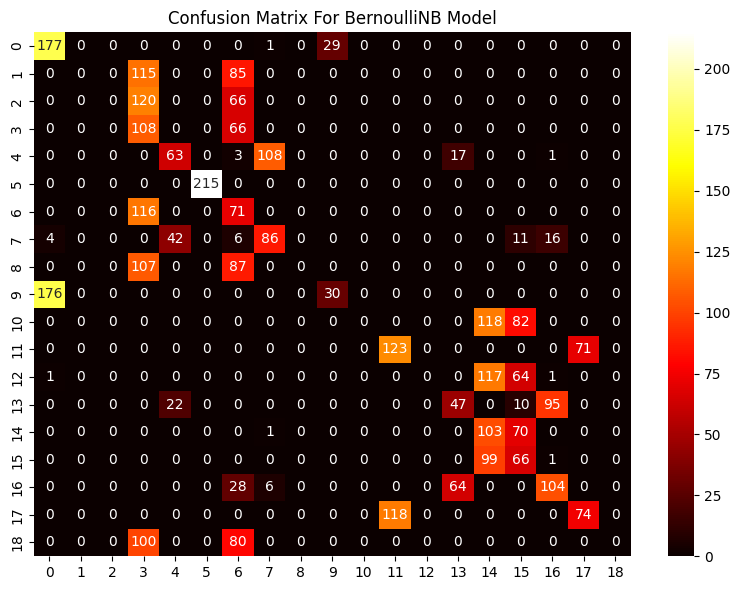

              precision    recall  f1-score   support

          -1       0.86      0.49      0.63       358
           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.62      0.16      0.26       666
           3       0.33      0.50      0.39       127
           4       1.00      1.00      1.00       215
           5       0.38      0.14      0.21       492
           6       0.52      0.43      0.47       202
           7       0.00      0.00      0.00         0
           8       0.15      0.51      0.23        59
           9       0.00      0.00      0.00         0
          10       0.63      0.51      0.57       241
          11       0.00      0.00      0.00         0
          12       0.27      0.37      0.31       128
          13       0.59      0.24      0.34       437
          14       0.40      0.22      0.28       303
          15       0.51      0.48      0.50       218
          16       0.39    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
BernoulliNB_model = BernoulliNB()
BernoulliNB_model.fit(X_train,y_train)

y_predicted_BNB = BernoulliNB_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted_BNB)
print(f'BernoulliNB Accuracy: {accuracy}')
models_names.append('BernoulliNB_model')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_BNB,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_BNB))

cm = confusion_matrix(y_test,y_predicted_BNB)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For BernoulliNB Model')
plt.tight_layout()
plt.show()

print(classification_report(y_predicted_BNB,y_test))

9 - Gradient Boosting Model

Gradient Boosting Accuracy: 0.9894179894179894


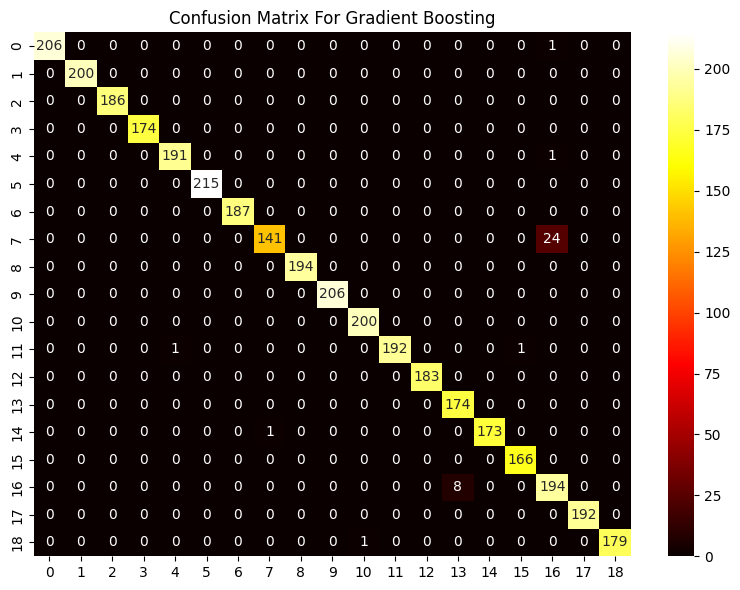

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       206
           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       186
           2       1.00      1.00      1.00       174
           3       0.99      0.99      0.99       192
           4       1.00      1.00      1.00       215
           5       1.00      1.00      1.00       187
           6       0.85      0.99      0.92       142
           7       1.00      1.00      1.00       194
           8       1.00      1.00      1.00       206
           9       1.00      1.00      1.00       201
          10       0.99      1.00      0.99       192
          11       1.00      1.00      1.00       183
          12       1.00      0.96      0.98       182
          13       0.99      1.00      1.00       173
          14       1.00      0.99      1.00       167
          15       0.96      0.88      0.92       220
          16       1.00    

In [44]:
GradientBoosting_model = GradientBoostingClassifier(n_estimators=5,max_depth=3)
GradientBoosting_model.fit(X_train,y_train)

y_predicted_GB = GradientBoosting_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted_GB)
print(f'Gradient Boosting Accuracy: {accuracy}')
models_names.append('Gradient Boosting')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_GB,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_GB))

cm = confusion_matrix(y_test,y_predicted_GB)

plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For Gradient Boosting')
plt.tight_layout()
plt.show()

print(classification_report(y_predicted_GB,y_test))

10 - Decision Tree Model

Decision Tree Accuracy: 0.999443052074631


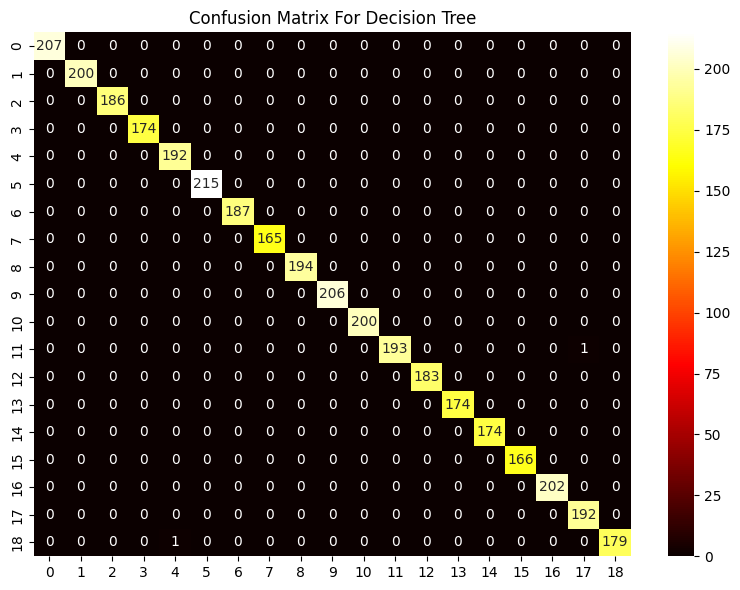

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       207
           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       186
           2       1.00      1.00      1.00       174
           3       1.00      0.99      1.00       193
           4       1.00      1.00      1.00       215
           5       1.00      1.00      1.00       187
           6       1.00      1.00      1.00       165
           7       1.00      1.00      1.00       194
           8       1.00      1.00      1.00       206
           9       1.00      1.00      1.00       200
          10       0.99      1.00      1.00       193
          11       1.00      1.00      1.00       183
          12       1.00      1.00      1.00       174
          13       1.00      1.00      1.00       174
          14       1.00      1.00      1.00       166
          15       1.00      1.00      1.00       202
          16       1.00    

In [45]:
DecisionTree_model = DecisionTreeClassifier(max_depth=50,random_state=42)
DecisionTree_model.fit(X_train,y_train)

y_predicted_DT = DecisionTree_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted_DT)
print(f'Decision Tree Accuracy: {accuracy}')
models_names.append('Decision Tree')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_DT,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_DT))

cm = confusion_matrix(y_test,y_predicted_DT)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For Decision Tree')
plt.tight_layout()
plt.show()

print(classification_report(y_predicted_DT,y_test))

11 - Random Forest Model

Random Forest Accuracy: 0.9991645781119465


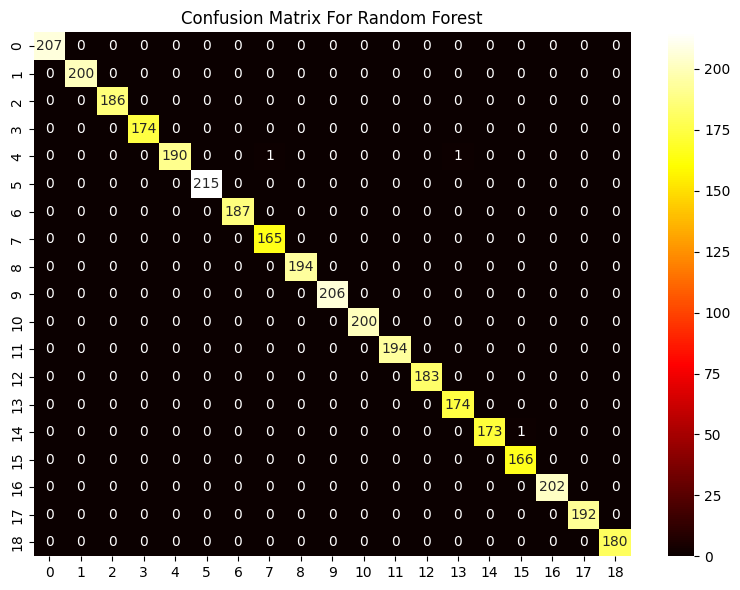

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       207
           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       186
           2       1.00      1.00      1.00       174
           3       0.99      1.00      0.99       190
           4       1.00      1.00      1.00       215
           5       1.00      1.00      1.00       187
           6       1.00      0.99      1.00       166
           7       1.00      1.00      1.00       194
           8       1.00      1.00      1.00       206
           9       1.00      1.00      1.00       200
          10       1.00      1.00      1.00       194
          11       1.00      1.00      1.00       183
          12       1.00      0.99      1.00       175
          13       0.99      1.00      1.00       173
          14       1.00      0.99      1.00       167
          15       1.00      1.00      1.00       202
          16       1.00    

In [46]:
rf_model = RandomForestClassifier(n_estimators=20,max_depth=10,random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')
models_names.append('Random Forest')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_pred,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For Random Forest')
plt.tight_layout()
plt.show()

print(classification_report(y_pred,y_test))

12 - Multi Layers Perceptrons ( MLP )

 0.9977722082985241


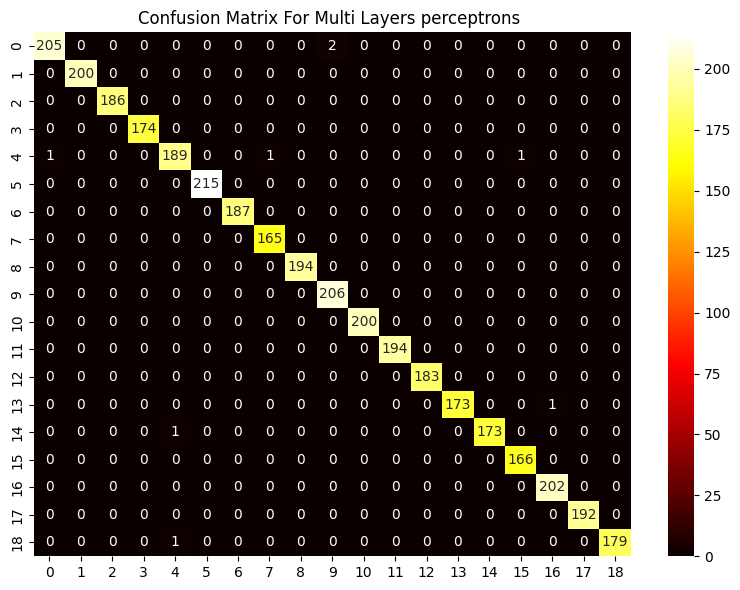

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       206
           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       186
           2       1.00      1.00      1.00       174
           3       0.98      0.99      0.99       191
           4       1.00      1.00      1.00       215
           5       1.00      1.00      1.00       187
           6       1.00      0.99      1.00       166
           7       1.00      1.00      1.00       194
           8       1.00      0.99      1.00       208
           9       1.00      1.00      1.00       200
          10       1.00      1.00      1.00       194
          11       1.00      1.00      1.00       183
          12       0.99      1.00      1.00       173
          13       0.99      1.00      1.00       173
          14       1.00      0.99      1.00       167
          15       1.00      1.00      1.00       203
          16       1.00    

In [47]:
Neural_Network_model = MLPClassifier(hidden_layer_sizes=(50,50),solver='adam',max_iter=500,activation='tanh')
Neural_Network_model.fit(X_train,y_train)

y_predicted_NN = Neural_Network_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_NN)
print(f' {accuracy}')
models_names.append('MLP Classifier')
accuracies_of_models.append(accuracy*100)
f1_score_of_models.append(f1_score(y_test,y_predicted_NN,average='macro'))
mse_of_models.append(mean_squared_error(y_test,y_predicted_NN))

cm = confusion_matrix(y_test,y_predicted_NN)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap="hot",fmt='d')
plt.title('Confusion Matrix For Multi Layers perceptrons ')
plt.tight_layout()
plt.show()

print(classification_report(y_predicted_NN,y_test))

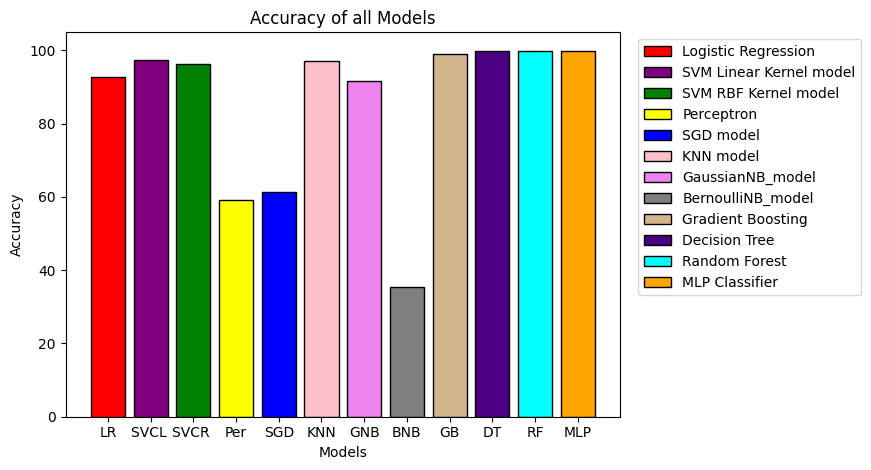

In [48]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'MLP'],
        accuracies_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()

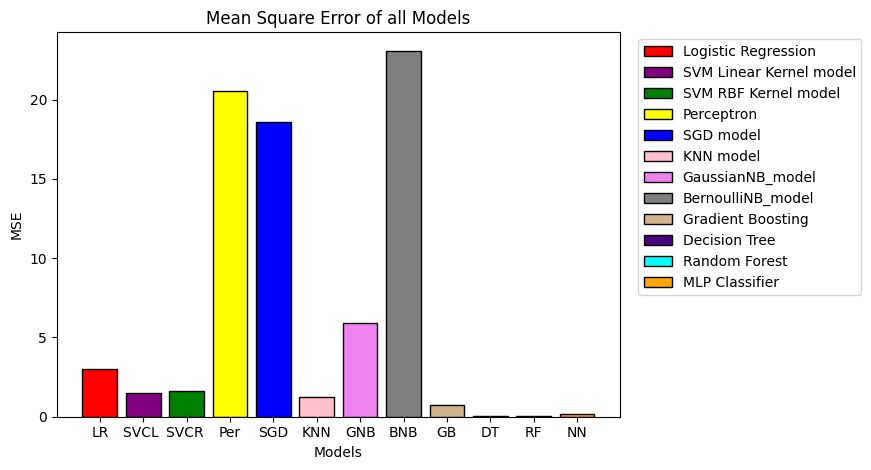

In [49]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'NN'],
        mse_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Square Error of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()

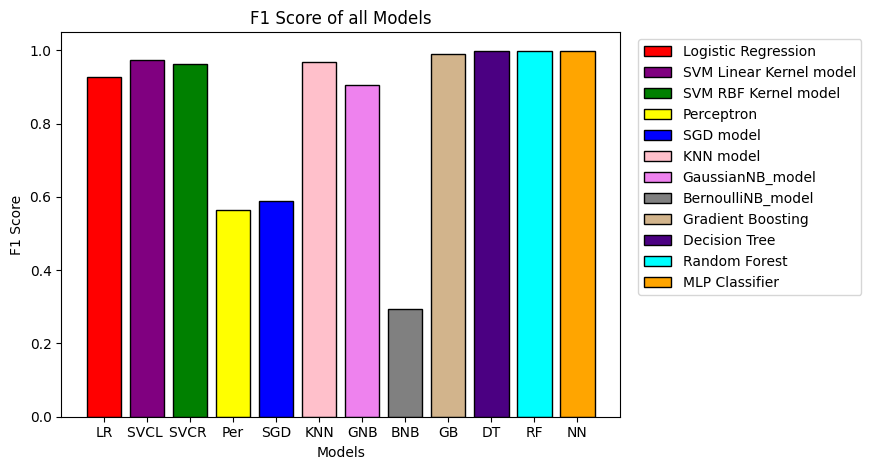

In [50]:
plt.bar(['LR', 'SVCL ', 'SVCR ', 'Per', 'SGD', 'KNN', 'GNB', 'BNB', 'GB', 'DT', 'RF', 'NN'],
        f1_score_of_models,
        color=['red','purple','green','yellow','blue','pink','violet','gray','tan','indigo','cyan','orange'],
        label=models_names,
        edgecolor='black')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of all Models')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.02,1))
plt.show()